<a href="https://colab.research.google.com/github/KeshavaOfficial/keshav/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv("/content/Titanic_test.csv")
df2 = pd.read_csv("/content/Titanic_train.csv")

In [3]:
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Checking null values

In [5]:
df1.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


# dropping cabin feature becoz that doesnt effect dependent value

In [6]:

df1 = df1.drop(columns=['Cabin','PassengerId','Name','Ticket','Fare','Embarked'], errors='ignore')


In [7]:
df1

,Pclass,Sex,Age,SibSp,Parch
0,3,male,34.5,0,0
1,3,female,47.0,1,0
2,2,male,62.0,0,0
3,3,male,27.0,0,0
4,3,female,22.0,1,1
...,...,...,...,...,...
413,3,male,NaN,0,0
414,1,female,39.0,0,0
415,3,male,38.5,0,0
416,3,male,NaN,0,0


In [8]:
df2 = df2.drop(columns=['PassengerId','Name', 'Ticket', 'Fare', 'Cabin' , 'Embarked'], errors='ignore')

In [9]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
888,0,3,female,NaN,1,2
889,1,1,male,26.0,0,0


# Changing Categorical values to Numerical vlues

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['Sex'] = le.fit_transform(df2['Sex'])
df1['Sex'] = le.fit_transform(df1['Sex'])

In [11]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0
...,...,...,...,...,...,...
886,0,2,1,27.0,0,0
887,1,1,0,19.0,0,0
888,0,3,0,NaN,1,2
889,1,1,1,26.0,0,0


In [12]:
df1

,Pclass,Sex,Age,SibSp,Parch
0,3,1,34.5,0,0
1,3,0,47.0,1,0
2,2,1,62.0,0,0
3,3,1,27.0,0,0
4,3,0,22.0,1,1
...,...,...,...,...,...
413,3,1,NaN,0,0
414,1,0,39.0,0,0
415,3,1,38.5,0,0
416,3,1,NaN,0,0


# Imputing Null values

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df2['Age'] = imputer.fit_transform(df2[['Age']])
df1['Age'] = imputer.fit_transform(df1[['Age']])

In [14]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.000000,1,0
1,1,1,0,38.000000,1,0
2,1,3,0,26.000000,0,0
3,1,1,0,35.000000,1,0
4,0,3,1,35.000000,0,0
...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0
887,1,1,0,19.000000,0,0
888,0,3,0,29.699118,1,2
889,1,1,1,26.000000,0,0


In [15]:
df1

,Pclass,Sex,Age,SibSp,Parch
0,3,1,34.50000,0,0
1,3,0,47.00000,1,0
2,2,1,62.00000,0,0
3,3,1,27.00000,0,0
4,3,0,22.00000,1,1
...,...,...,...,...,...
413,3,1,30.27259,0,0
414,1,0,39.00000,0,0
415,3,1,38.50000,0,0
416,3,1,30.27259,0,0


<Axes: ylabel='Count'>

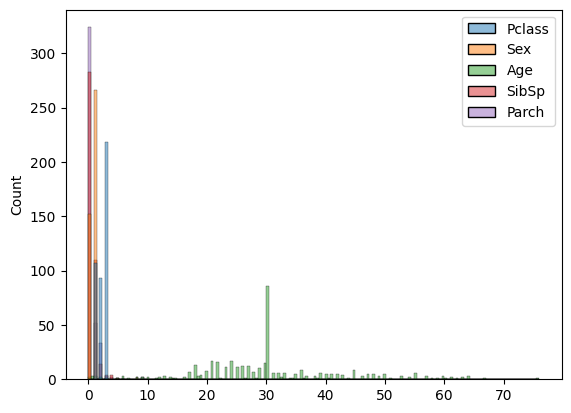

In [16]:
sns.histplot(df1)

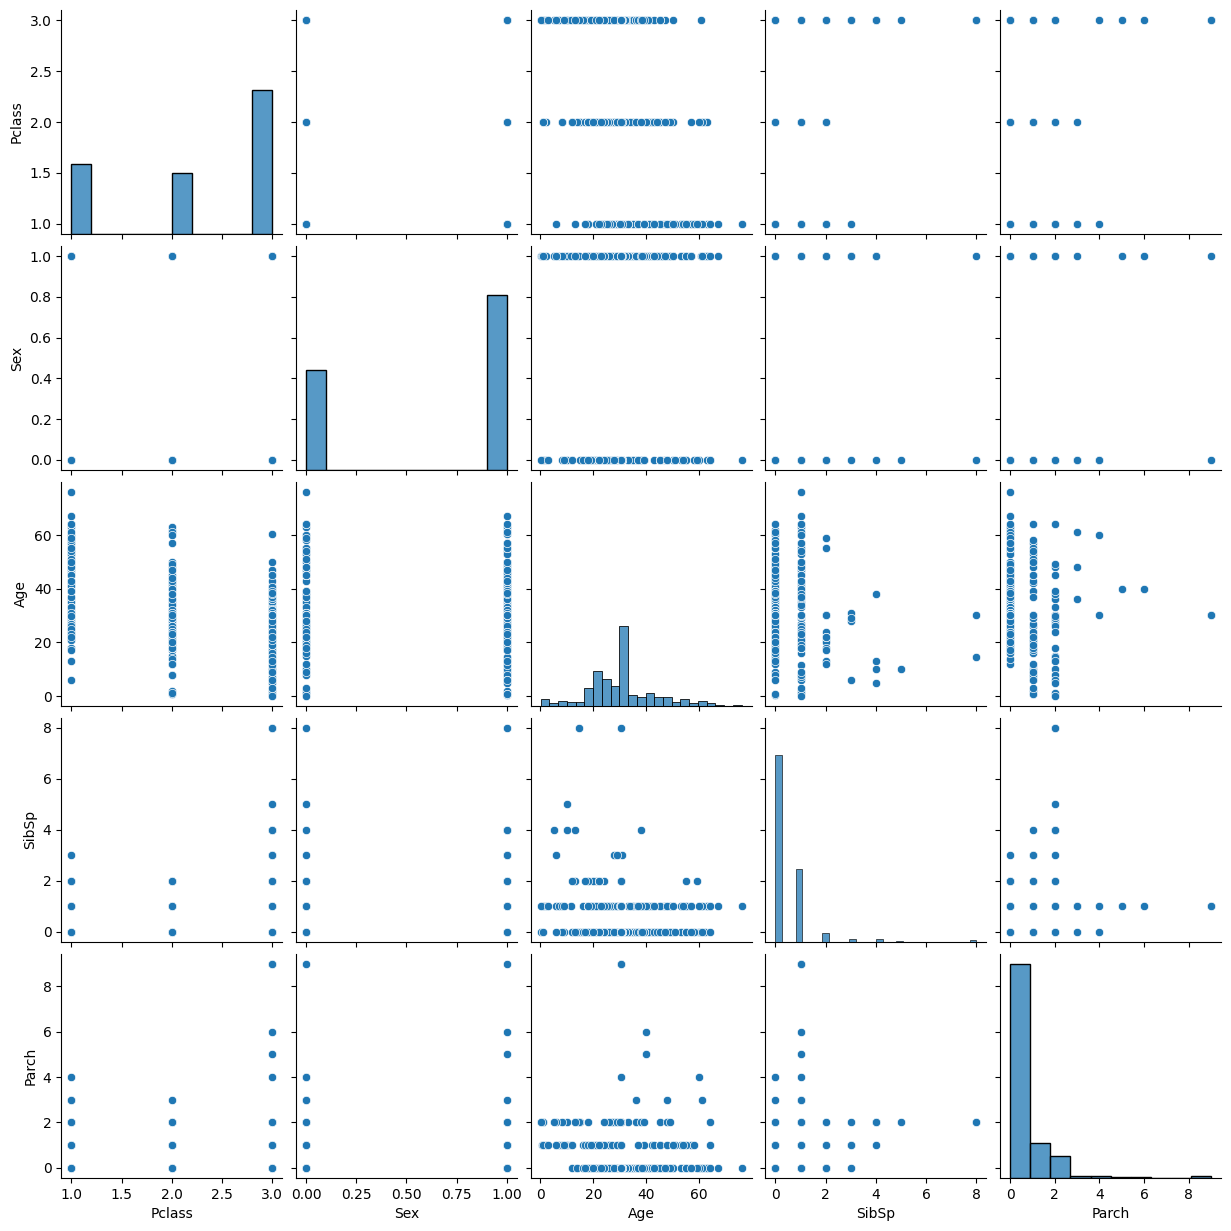

In [17]:
sns.pairplot(df1)

<Axes: >

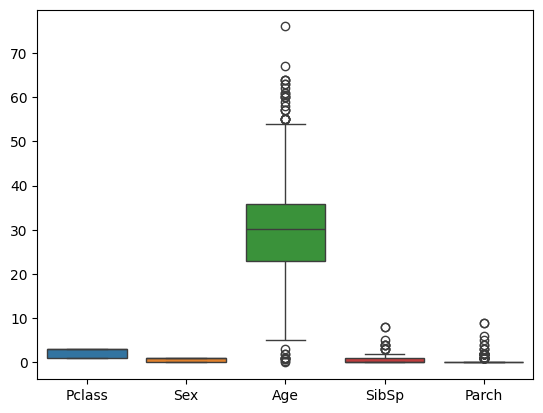

In [18]:
sns.boxplot(df1)

In [19]:
q1 = df1.quantile(0.25)
q3 = df1.quantile(0.75)
iqr = q3 - q1

<Axes: >

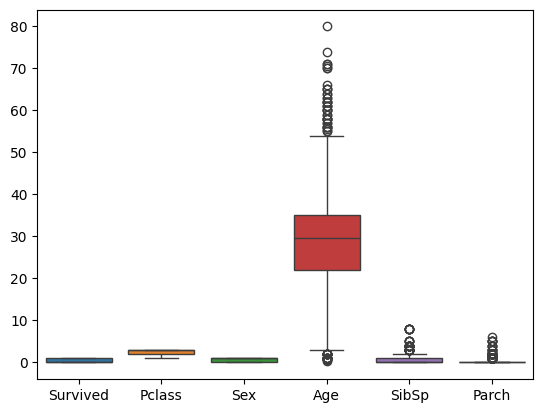

In [20]:
sns.boxplot(df2)

In [21]:
q1 = df2.quantile(0.25)
q3 = df2.quantile(0.75)
iqr = q3 - q1

In [22]:
iqr = pd.DataFrame(iqr)

# Impleting Models to data

In [23]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.000000,1,0
1,1,1,0,38.000000,1,0
2,1,3,0,26.000000,0,0
3,1,1,0,35.000000,1,0
4,0,3,1,35.000000,0,0
...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0
887,1,1,0,19.000000,0,0
888,0,3,0,29.699118,1,2
889,1,1,1,26.000000,0,0


In [24]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.000000,1,0
1,1,1,0,38.000000,1,0
2,1,3,0,26.000000,0,0
3,1,1,0,35.000000,1,0
4,0,3,1,35.000000,0,0
...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0
887,1,1,0,19.000000,0,0
888,0,3,0,29.699118,1,2
889,1,1,1,26.000000,0,0


In [26]:
df2 = df2.drop(columns=['SibSp','Parch'], errors = 'ignore')

In [27]:
df2

,Survived,Pclass,Sex,Age
0,0,3,1,22.000000
1,1,1,0,38.000000
2,1,3,0,26.000000
3,1,1,0,35.000000
4,0,3,1,35.000000
...,...,...,...,...
886,0,2,1,27.000000
887,1,1,0,19.000000
888,0,3,0,29.699118
889,1,1,1,26.000000


In [28]:
df2 = df2.drop(columns=['Pclass'], errors = 'ignore')

In [29]:
df2

,Survived,Sex,Age
0,0,1,22.000000
1,1,0,38.000000
2,1,0,26.000000
3,1,0,35.000000
4,0,1,35.000000
...,...,...,...
886,0,1,27.000000
887,1,0,19.000000
888,0,0,29.699118
889,1,1,26.000000


# splitting Data into X and Y

In [30]:
x = df2.iloc[: , 1:]

In [31]:
x

,Sex,Age
0,1,22.000000
1,0,38.000000
2,0,26.000000
3,0,35.000000
4,1,35.000000
...,...,...
886,1,27.000000
887,0,19.000000
888,0,29.699118
889,1,26.000000


In [32]:
y = df2.iloc[ :, 0]

In [33]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


# Training X and Y data

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [36]:
y_pred = lr.predict(x_test)

# Intially ROC_AUC Score

In [40]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_score(y_test, y_pred)

0.7703989703989704

In [41]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(x_train)
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.512922
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      709
Method:                           MLE   Df Model:                            2
Date:                Sun, 16 Mar 2025   Pseudo R-squ.:                  0.2255
Time:                        19:56:33   Log-Likelihood:                -365.20
converged:                       True   LL-Null:                       -471.54
Covariance Type:            nonrobust   LLR p-value:                 6.560e-47
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1018      0.248      4.438      0.000       0.615       1.588
Sex           -2.5093      0.

# Low p-values (< 0.05) → Feature is significant in predicting survival.
# High p-values (> 0.05) → Feature has little impact on survival.

# SEX Pvalue is (0.000 ) Less, so it is significant in predicting survival and AGE pvalue is (0.757)  is more than 0.05, so it is not significant in predicting the survival

# Lets visualize

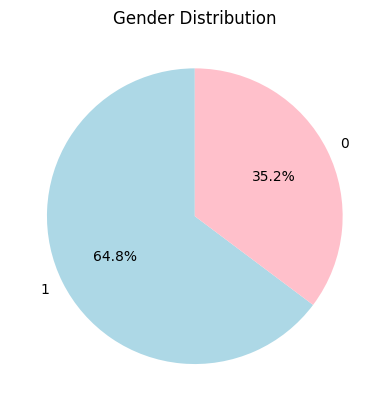

In [50]:
df2['Sex'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'pink'], startangle=90)
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()


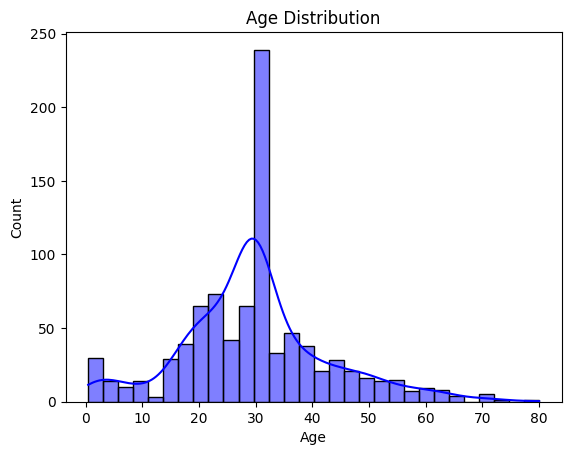

In [52]:
sns.histplot(df2['Age'].dropna(), bins=30, kde=True, color='blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()


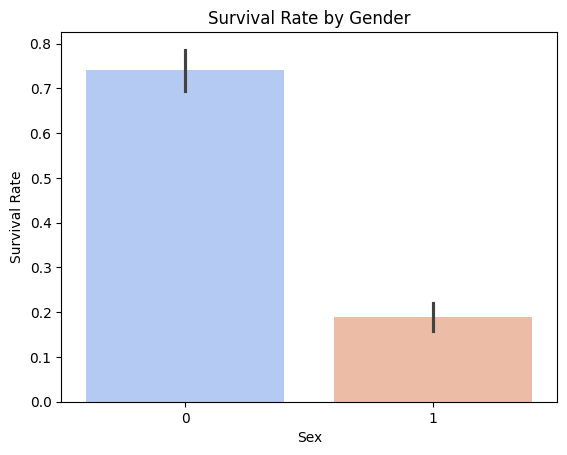

In [54]:
sns.barplot(x='Sex', y='Survived', data=df2, palette='coolwarm')
plt.title("Survival Rate by Gender")
plt.xlabel("Sex")
plt.ylabel("Survival Rate")
plt.show()
